## Part B: Analysis

I am investigating the question:
"Which countries contribute the most titles, and how has that changed over time?"
This question necessitates also answering "How has the number of titles added to Netflix changed over time?", but complicates it by separating based on country.

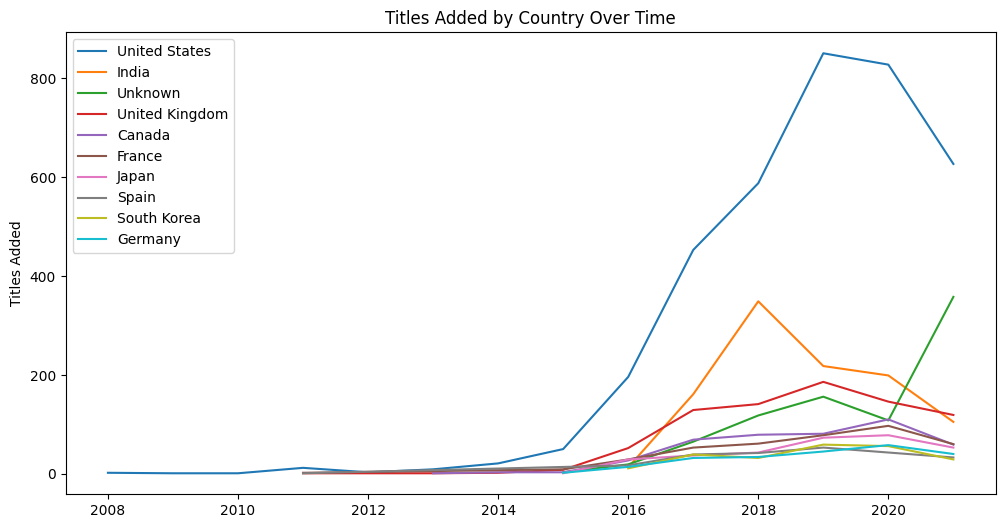

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 120)

DATA_DIR = Path("data")
CSV_PATH = DATA_DIR / "netflix_titles.csv"
df = pd.read_csv(CSV_PATH)

df['year_added'] = pd.to_datetime(df['date_added'], errors='coerce').dt.year
# split & explode the country column to fix titles submitted by multiple countries
df['country'] = df['country'].fillna('Unknown')
df['country'] = df['country'].str.split(', ')
df = df.explode('country')

# graph top 10 countries overall (not just in the most recent year)
# this helps us see how the distribution has changed over time
country_year_counts = df.groupby(['year_added', 'country']).size().reset_index(name='count')
top10_overall = country_year_counts.groupby('country')['count'].sum().nlargest(10).index
# plot
plt.figure(figsize=(12, 6))
for country in top10_overall:
    country_data = country_year_counts[country_year_counts['country'] == country]
    plt.plot(country_data['year_added'], country_data['count'], label=country)
plt.title('Titles Added by Country Over Time')
plt.ylabel('Titles Added')
plt.legend()
plt.show()